In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys


# Find the root directory by traversing up the directory tree
def find_project_root(current_path):
    if os.path.exists(os.path.join(current_path, "README.md")):
        return current_path
    parent_path = os.path.dirname(current_path)
    if parent_path == current_path:
        raise ValueError("Project root not found.")
    return find_project_root(parent_path)


current_dir = os.getcwd()
project_root = find_project_root(current_dir)
sys.path.append(str(project_root))
print(f"Project root: {project_root}")

# flake8: noqa  # Disable Flake8 for the following block
import gymnasium as gym
from src.models.bank_env import BankEnv
from src.models.bank_model import Bankmodel
from src.tests import test_bankmodel_a2c_train as tests

Project root: f:\OneDrive\Documents\GitHub\rl-alm


In [2]:
env_id = "bank-v3"
gym.register(id=env_id, entry_point=BankEnv, max_episode_steps=60)
# Random walk in the environment
tests.random_walk(env_id)

2023-09-27 17:23:29.744 | INFO     | src.data.dataset:read_data:46 - reading interest data from ESW.
2023-09-27 17:23:31.204 | INFO     | src.data.dataset:read_data:46 - reading zerocurve data from ESW.


Interest period:  (Timestamp('2010-06-01 00:00:00'), Timestamp('2023-06-01 00:00:00'))
Zerocurve period:  (Timestamp('2010-06-01 00:00:00'), Timestamp('2023-06-30 00:00:00'))
steps:  60
score:  -326


In [3]:
# Monkey patch the reward function
def get_reward(self):
        nii = 0
        liquidity_penalty = 0
        risk_penalty = self.get_risk_penalty()
        reward = - risk_penalty
        return int(reward), int(nii), int(risk_penalty), int(liquidity_penalty)

MORTGAGE_AMOUNT = 5000
Bankmodel.get_reward = get_reward

In [4]:
log_dir="tmp/"
os.makedirs(log_dir, exist_ok=True)
env = gym.make(env_id, render_mode="human")

2023-09-27 17:23:40.969 | INFO     | src.data.dataset:read_data:46 - reading interest data from ESW.
2023-09-27 17:23:42.366 | INFO     | src.data.dataset:read_data:46 - reading zerocurve data from ESW.


Interest period:  (Timestamp('2010-06-01 00:00:00'), Timestamp('2023-06-01 00:00:00'))
Zerocurve period:  (Timestamp('2010-06-01 00:00:00'), Timestamp('2023-06-30 00:00:00'))


In [5]:
# Train the model
env, model = tests.train_model(env, steps=300_000, ent_coef=0.01, model_name = 'A2C_Risk_Only')

Output()

KeyboardInterrupt: 

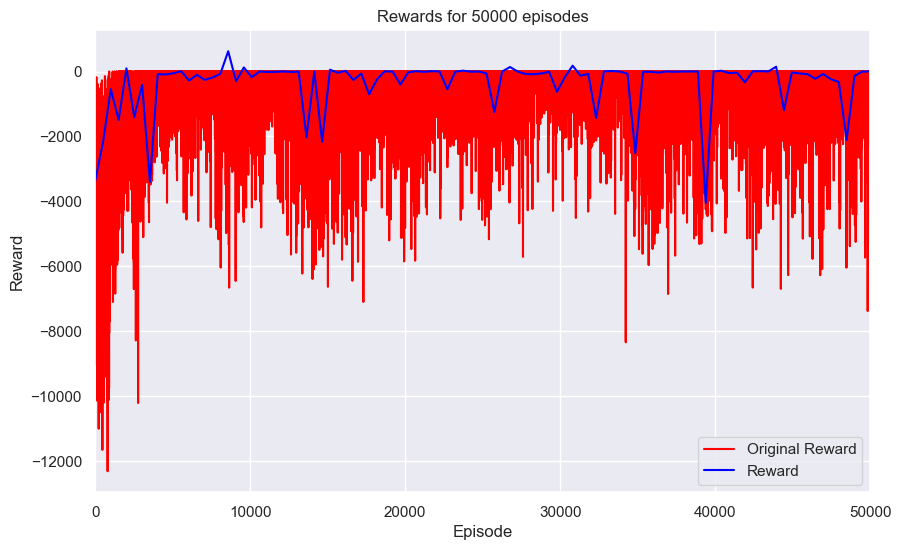

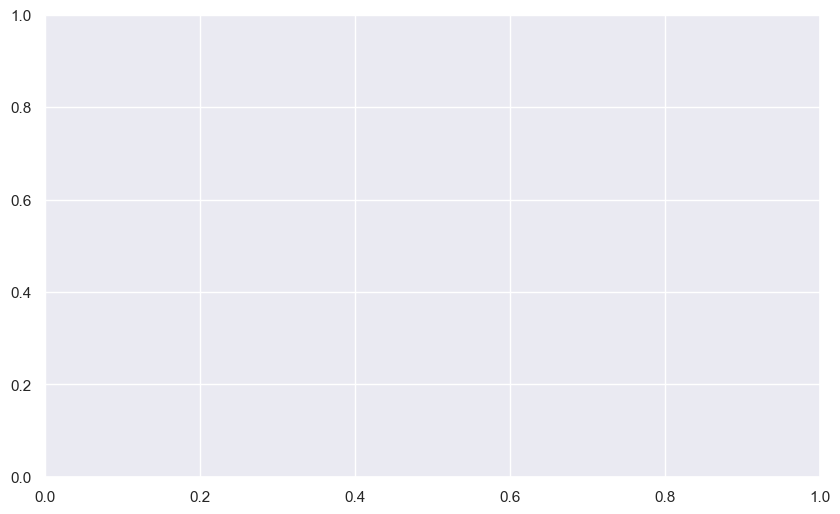

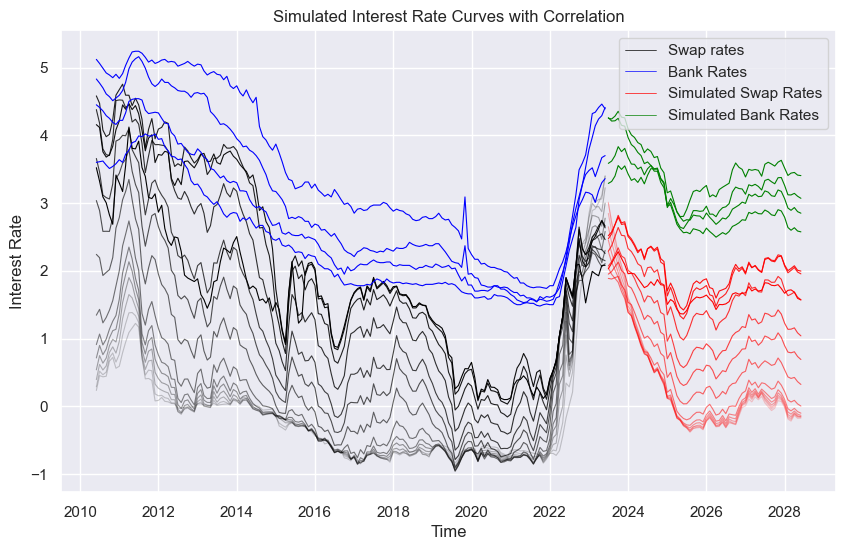

<Figure size 1000x600 with 0 Axes>

In [ ]:
env = tests.get_innermost_env(env)
env.plot_rewards()

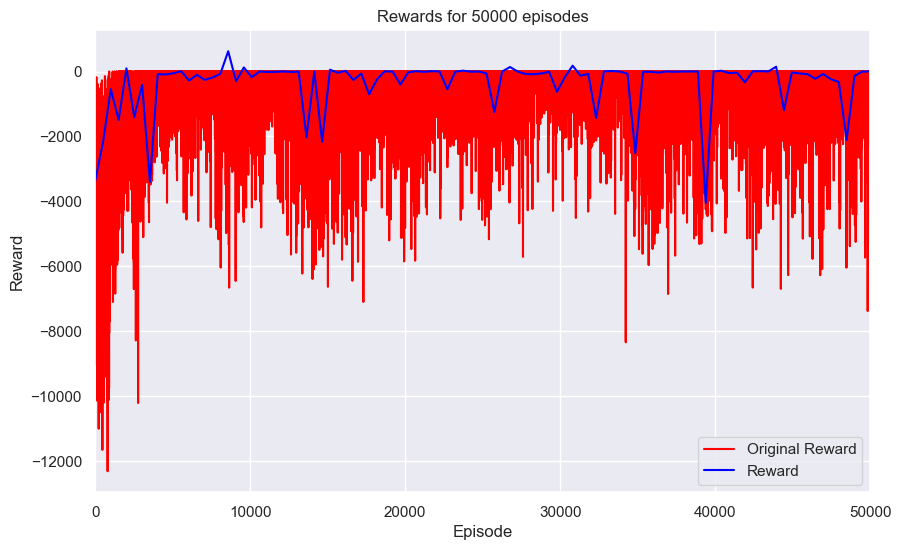

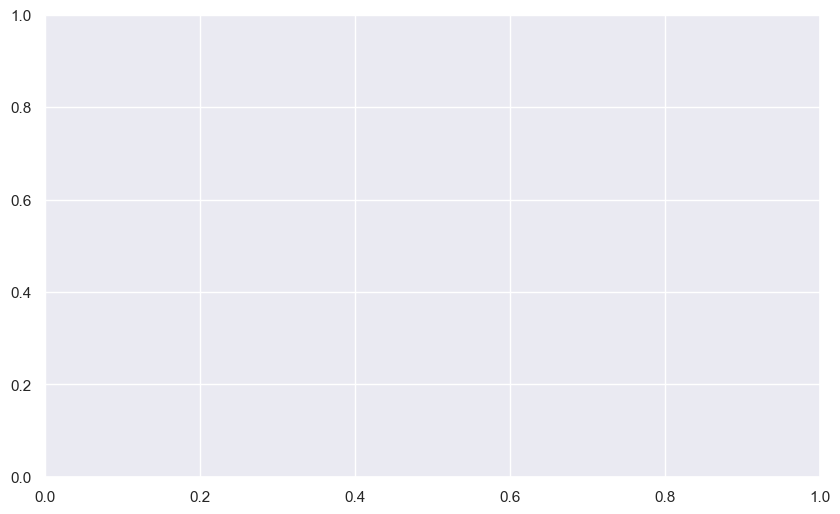

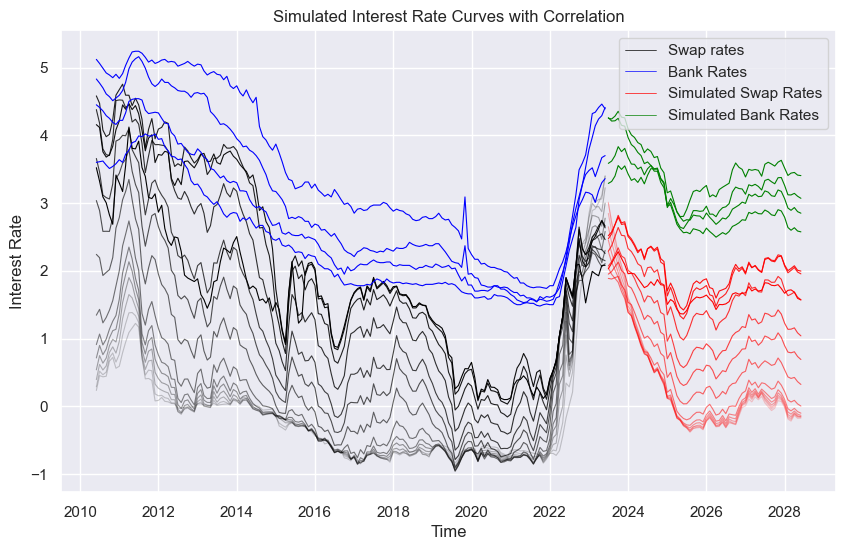

2023-09-17 09:22:29.247 | INFO     | src.data.dataset:read_data:46 - reading interest data from ESW.
2023-09-17 09:22:30.789 | INFO     | src.data.dataset:read_data:46 - reading zerocurve data from ESW.


Interest period:  (Timestamp('2010-06-01 00:00:00'), Timestamp('2023-06-01 00:00:00'))
Zerocurve period:  (Timestamp('2010-06-01 00:00:00'), Timestamp('2023-06-30 00:00:00'))


f:\OneDrive\Documents\GitHub\rl-alm\rl-alm\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\OneDrive\Documents\GitHub\rl-alm\rl-alm\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\OneDrive\Documents\GitHub\rl-alm\rl-alm\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\OneDrive\Documents\GitHub\rl-alm\rl-alm\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

<Figure size 1000x600 with 0 Axes>

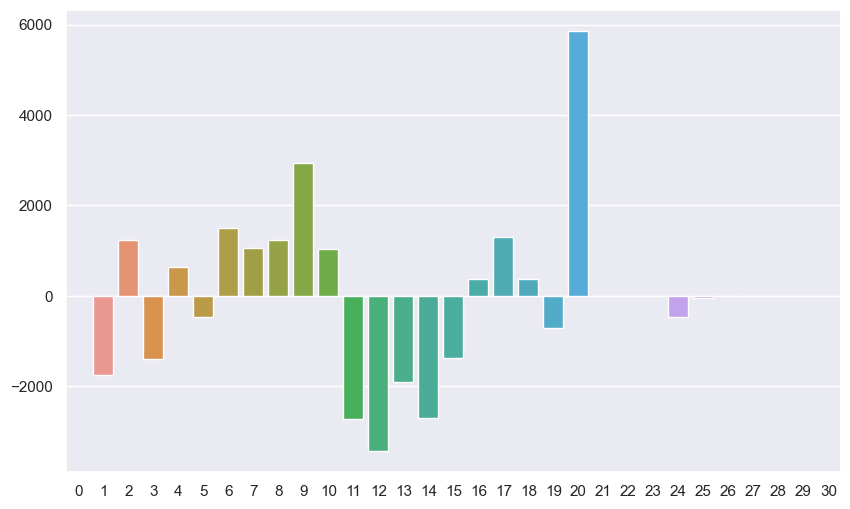

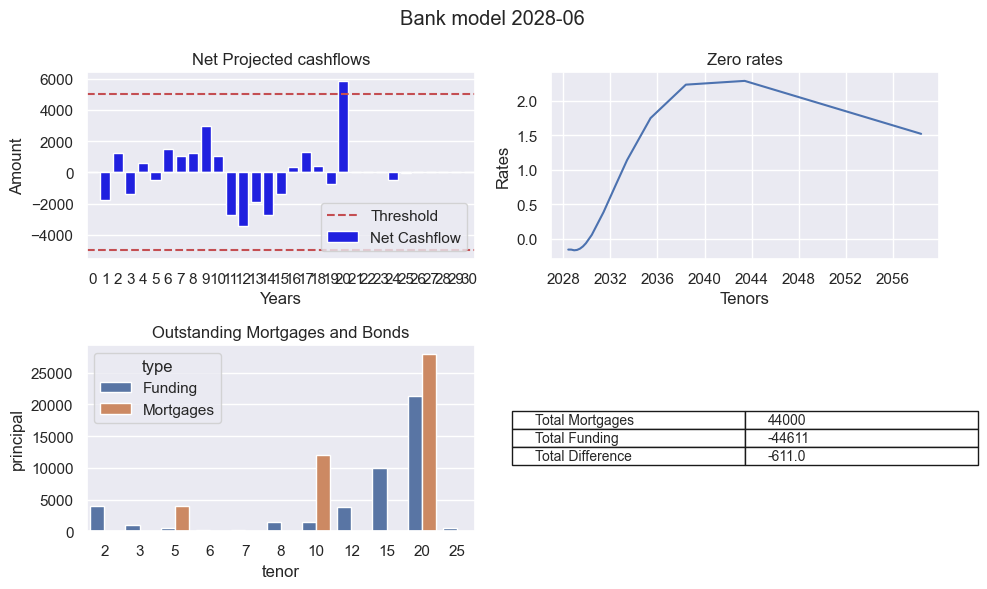

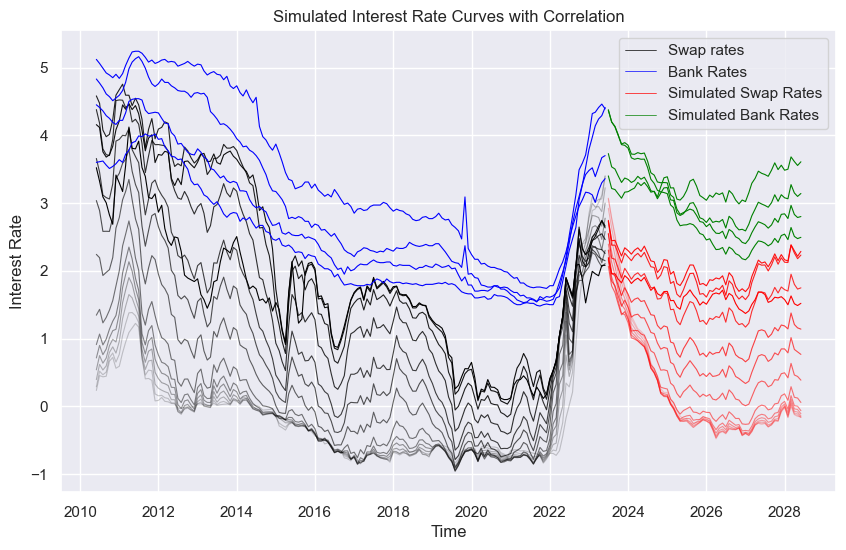

score:  -14
all done... That's all folks! 


<Figure size 1000x600 with 0 Axes>

In [ ]:
nv = tests.get_innermost_env(env)
env.plot_rewards()

score = tests.show_model(env_id, model=model)

print("score: ", score)
print("all done... That's all folks! ")

In [ ]:
# Monkey patch the reward function - just focus on NII
def get_reward(self):
        nii, income, funding_cost = self.calculate_nii()
        liquidity_penalty = 0
        risk_penalty = self.get_risk_penalty()
        reward = nii
        return int(reward), int(nii), int(risk_penalty), int(liquidity_penalty)

MORTGAGE_AMOUNT = 5000
Bankmodel.get_reward = get_reward

In [ ]:
log_dir="tmp/"
os.makedirs(log_dir, exist_ok=True)
env = gym.make(env_id, render_mode="human")

2023-09-17 09:23:38.228 | INFO     | src.data.dataset:read_data:46 - reading interest data from ESW.
2023-09-17 09:23:39.798 | INFO     | src.data.dataset:read_data:46 - reading zerocurve data from ESW.


Interest period:  (Timestamp('2010-06-01 00:00:00'), Timestamp('2023-06-01 00:00:00'))
Zerocurve period:  (Timestamp('2010-06-01 00:00:00'), Timestamp('2023-06-30 00:00:00'))


In [ ]:
# Train the model
env, model = tests.train_model(env, steps=3_000_000, ent_coef=0.01, model_name = 'A2C')

Output()

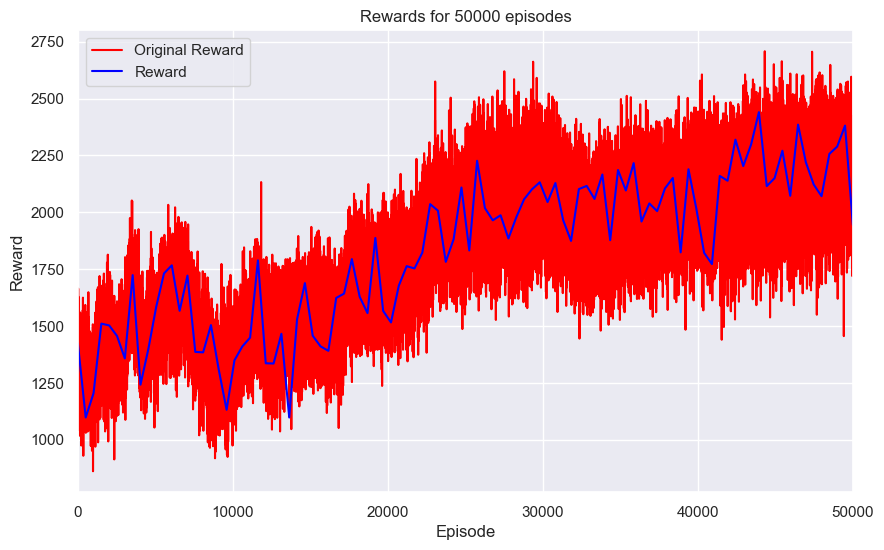

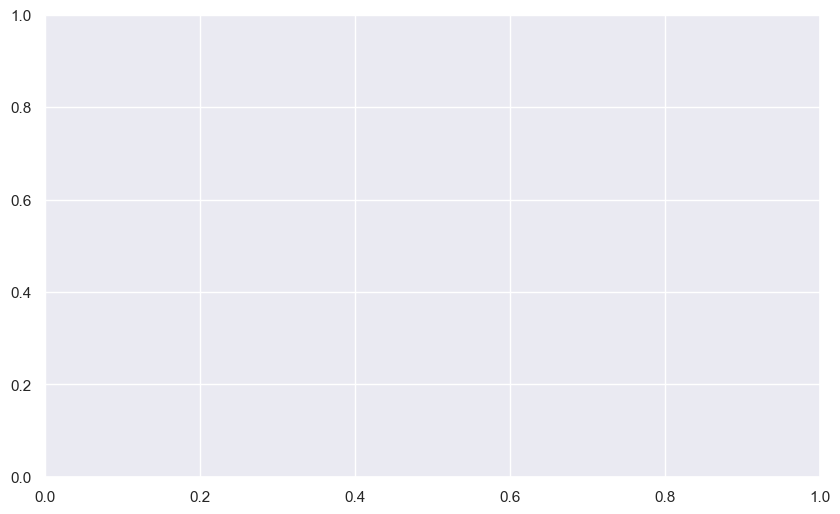

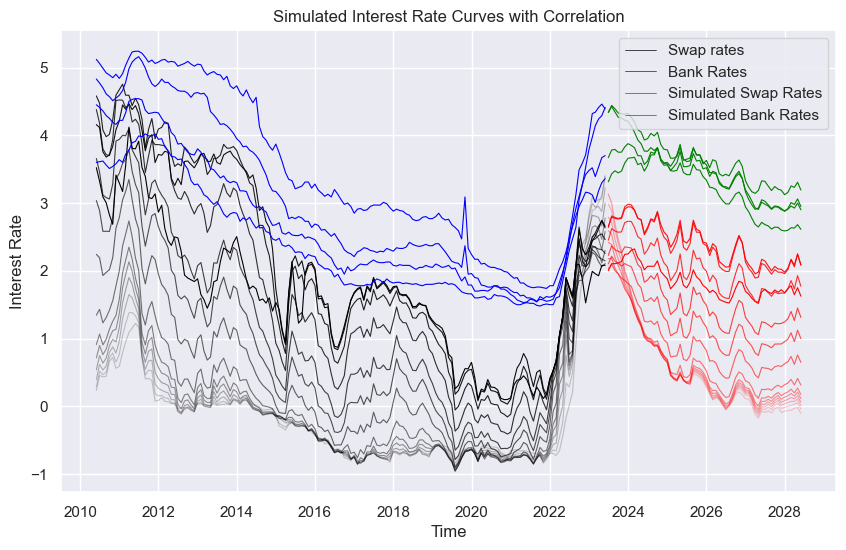

2023-09-17 16:47:03.396 | INFO     | src.data.dataset:read_data:46 - reading interest data from ESW.
2023-09-17 16:47:05.419 | INFO     | src.data.dataset:read_data:46 - reading zerocurve data from ESW.


Interest period:  (Timestamp('2010-06-01 00:00:00'), Timestamp('2023-06-01 00:00:00'))
Zerocurve period:  (Timestamp('2010-06-01 00:00:00'), Timestamp('2023-06-30 00:00:00'))


f:\OneDrive\Documents\GitHub\rl-alm\rl-alm\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\OneDrive\Documents\GitHub\rl-alm\rl-alm\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\OneDrive\Documents\GitHub\rl-alm\rl-alm\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\OneDrive\Documents\GitHub\rl-alm\rl-alm\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

<Figure size 1000x600 with 0 Axes>

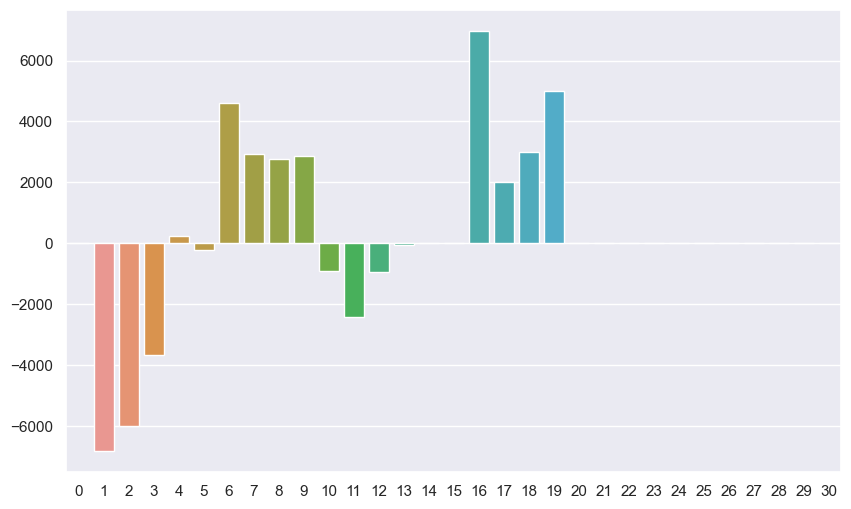

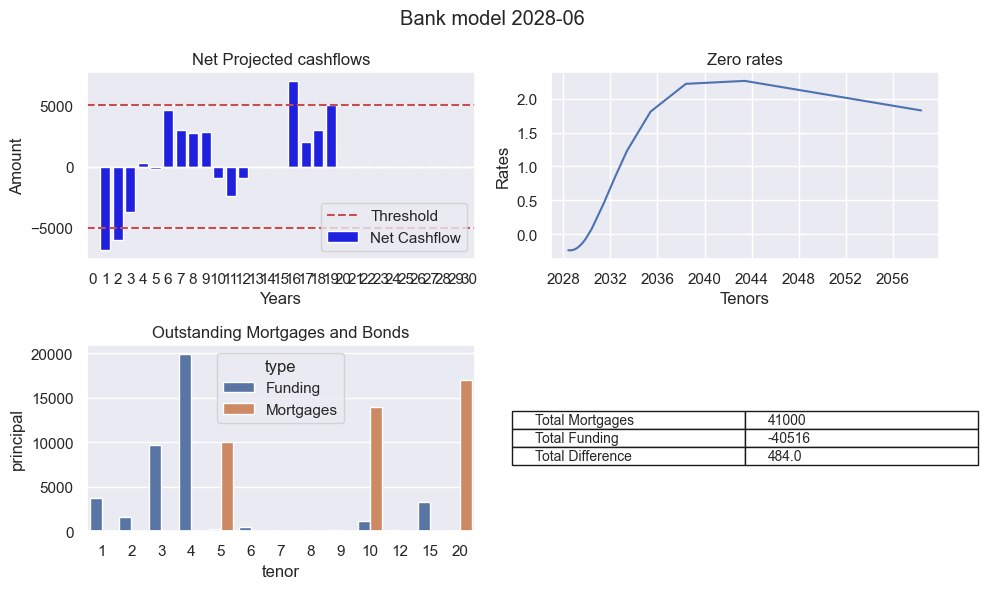

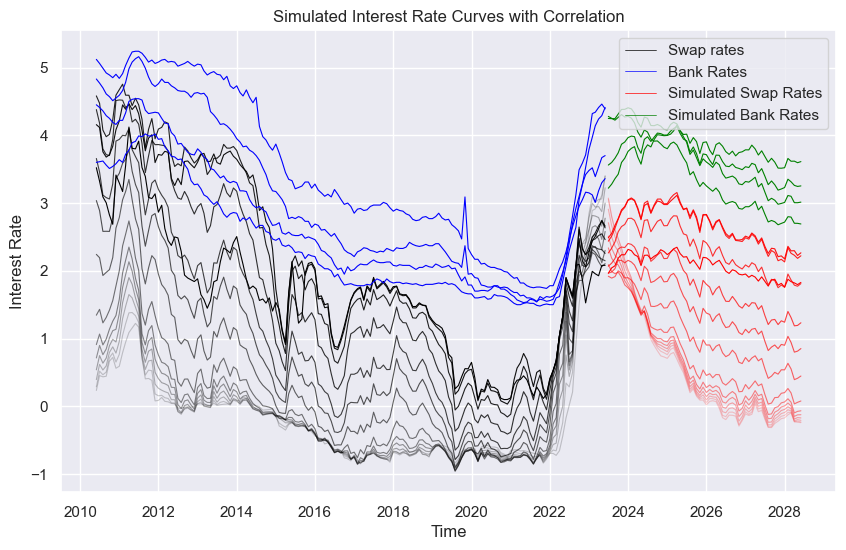

score:  2279
all done... That's all folks! 


<Figure size 1000x600 with 0 Axes>

In [ ]:
nv = tests.get_innermost_env(env)
env.plot_rewards()

score = tests.show_model(env_id, model=model)

print("score: ", score)
print("all done... That's all folks! ")

# Hyperparameter tuning

Check hyperparamters that may help perfomance of the model.

- Using robustscaler on the state of the environment
- entropy coefficient (Trade off between Exploration and exploitation)
- learning rate 